# Пространство имён

Ранее мы могли задать функцию определив в ней переменную и для этой переменной **было принято правило** о том что она существует только внутри функции и только в ней.

In [1]:
def func():
    s = 20
    return s

print(s)

NameError: name 's' is not defined

На самом деле область которая используется внутри функции называется **"локальной"**. Потому что она существует только в КОНТЕКСТЕ исполнения функции.

In [2]:
# Глобальная область
s = 10

def func():
    # Локальная область
    s = 20
    return s

print(s)
func()
print(s)

10
10


**Глобальная** область видимости -- это такая область которая задается с самого начала запуска нашей программы, и находится на 0 позиции относительно строки выполнения кода.

**Встроенное** пространство(объемлящая область видимости) -- область которая пораждается ОТНОСИТЕЛЬНО ЛОКАЛЬНОЙ ОБЛАСТИ. т.е. внутри локальной пораждается ещё одна локальная.


**Встроенное** пространство имен включает в себя имена каких-либо встроенных функций. **Локальное** представляет собой имена, которые мы используем внутри каких-либо функций, которые мы используем и создаем самостоятельно. **Глобальное** пространство имен включает в себя все, что есть в нашей программе, исключая лишь локальное пространство.

In [3]:
# Глобальная область
s = 10
def func():
    # Локальная область
    s = 20
    def func2():
        # Объемляющая область
        s = 30
    func2() # * т.е. только вот тут может быть вызвана объемлящая функция

print(s)
func()
# func2()# Ошибка, т.к. данная функция находится внутри локальной области и может существовать только в связке с func() *
print(s)

10
10


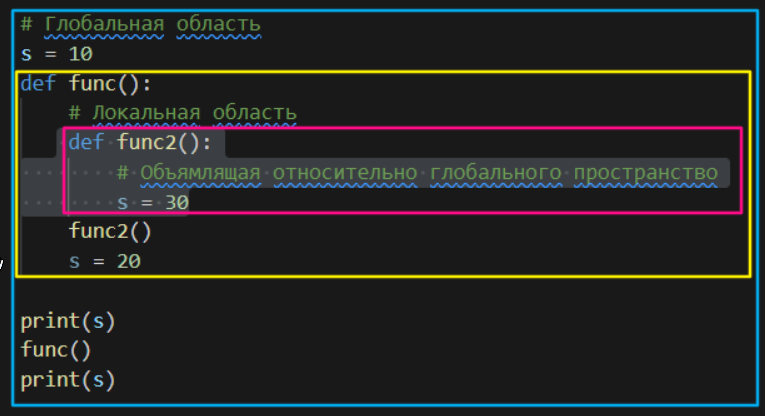

Но данную "историю" мы можем использовать по другом **простроя связь** между данными функциями и областями 

# **Работает не корректно в ipynb смотреть в .py файле**

globals - позволяет просматривать значения и данные находящие на ГЛОБАЛЬНОМ УРОВНЕ

locals - позволяет просматривать данные и значения ОТНОСИТЕЛЬНО ТОЙ ОБЛАСТИ в которой находится на данный момент

`global *объект*` - позволяет "позаимствовать" объект из глобальной области, И ТОЛЬКО ИЗ НЕЁ

`nonloca *объект*` - позволяет "позаимствовать" объект из локальной области, относительно объемлящей из которой происходи запрос

<u>Если, на предыдущей области видимости была испольвана конструкция, в последующей объемлящей использовать `nonlocal` нельзя</u>


In [ ]:
# Глобальная область
s = 10
d = 29
def func():
    global s # Фактически когда мы пишем такую запись мы не создаем переменную относительно этой области, а мы заимствуем её из глобальной 
    # Локальная область
    s = 20
    
    def func2():
        # nonlocal s
        global s
        # Объемляющая область
        s = 30
    
    print(f'Первое выполнение func(), значения в локальной области {locals()}')
    func2()
    print(f'Выполнение после func2(). {locals()=}')
    
print(f'Значения в глобальной области {globals()} ДО исполнения кода')
print(f'{s=}')
func()
print(f'{s=}')
print(f'Значения в глобальной области {globals()} ПОСЛЕ исполнения кода')
# func2()# Ошибка, т.к. данная функция находится внутри локальной области и может существовать только в связке с func() *

Рассмотрим выполнение конструкции nonlocal . В данном случае когда s из func() заимствуется внутрь другой объемлящей области(func2) s из списка доступных локальных объектов (locals) будет отображена как собственный локальный объект в отличии от globals 

In [ ]:
# Глобальная область
s = 10
d = 29
def func():
    # Локальная область
    s = 20
    
    def func2():
        # nonlocal s
        nonlocal s
        # Объемляющая область
        print(f'Локальное пространство внутри func2(), {locals()}')
        s = 30
        print(f'Локальное пространство внутри func2(), {locals()}')
    
    print(f'Первое выполнение func(), значения в локальной области {locals()}')
    func2()
    print(f'Выполнение после func2(), значение в локальной области {locals()}')
    
# print(f'Значения в глобальной области {globals()} ДО исполнения кода')
# print(f'{s=}')
func()
# print(f'{s=}')
# print(f'Значения в глобальной области {globals()} ПОСЛЕ исполнения кода')
# func2()# Ошибка, т.к. данная функция находится внутри локальной области и может существовать только в связке с func() *

# Немного примеров. **Лучше запускать в .py файле**

Задача со складом. У нас есть общее хранилище с продуктами. Описывается 3 функции для взаимодействия со складом.

- add_item - добавляет предмет на склад
- remove_item - удаляет предмет на склад
- display_inventory - отображает текущее состояние склада склад

In [4]:
inv = {}

def add_item(item: str, quantity: int):
    if item in inv:
        inv[item] += quantity
    else:
        inv[item] = quantity

def remove_item(item: str, quantity: int):
    if item in inv:
        if inv[item] >= quantity:
            inv[item] -= quantity
        else:
            print(f'Ошибка: недостаточно {item} на складе')
    else:
        print(f"Ошибка: {item} отсутствует на складе")

def display_inventory():
    print('Склад', end='\n\n')
    for item, quantity in inv.items():
        print(f"{item}: {quantity}")
    print()

if __name__ == "__main__": # Если файл который мы запускаем, является ГЛАВНЫМ или ОСНОВНЫМ ЗАПУСКАЕМЫМ то выполняем код под условием
    print(f'{inv=}')
    add_item("Яблоки",50)
    add_item("Бананы",30)
    display_inventory()
    remove_item("Яблоки",30)
    display_inventory()
    remove_item("Груши",10)
    print(f'{inv=}')


inv={}
Склад

Яблоки: 50
Бананы: 30

Склад

Яблоки: 20
Бананы: 30

Ошибка: Груши отсутствует на складе
inv={'Яблоки': 20, 'Бананы': 30}


Любую переменную заданную в глобальной области можно использовать внутри всех остальных областей, без явного обращения с помощью globals

Изменение и добавление значений, будет оказывать влияние на саму переменную ТОЛЬКО если её тип данных изменяемый